# RED NEURONAL CONVOLUCIONAL PARA CLASIFICACION DE IMAGENES RX CON NEUMONIA POR COVID 19

## DATASET : [KAGGLE](https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/data)

# CARGAMOS DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
base_dir = '/content/drive/MyDrive/Datasets/covid 19'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
print(train_dir)
print(validation_dir)
print(test_dir)

/content/drive/MyDrive/Datasets/covid 19/train
/content/drive/MyDrive/Datasets/covid 19/validation
/content/drive/MyDrive/Datasets/covid 19/test


In [4]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

print(train_normal_dir)
print(train_pneumonia_dir)
print(validation_normal_dir)
print(validation_pneumonia_dir)
print(test_normal_dir)
print(test_pneumonia_dir)

/content/drive/MyDrive/Datasets/covid 19/train/NORMAL
/content/drive/MyDrive/Datasets/covid 19/train/PNEUMONIA
/content/drive/MyDrive/Datasets/covid 19/validation/NORMAL
/content/drive/MyDrive/Datasets/covid 19/validation/PNEUMONIA
/content/drive/MyDrive/Datasets/covid 19/test/NORMAL
/content/drive/MyDrive/Datasets/covid 19/test/PNEUMONIA


In [32]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def mostrar_imagenes_aleatorias(directorio, num_imagenes=5):
    # Obtener lista de archivos de imagen en el directorio
    imagenes = os.listdir(directorio)

    # Filtrar archivos para obtener solo las imágenes (por ejemplo, con extensiones jpg o png)
    imagenes = [img for img in imagenes if img.endswith(('.jpg', '.jpeg', '.png'))]

    # Seleccionar imágenes aleatorias
    imagenes_aleatorias = random.sample(imagenes, min(num_imagenes, len(imagenes)))

    # Mostrar las imágenes seleccionadas
    for img_name in imagenes_aleatorias:
        img_path = os.path.join(directorio, img_name)
        img = mpimg.imread(img_path)

        plt.figure()
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')  # Ocultar los ejes
        plt.show()

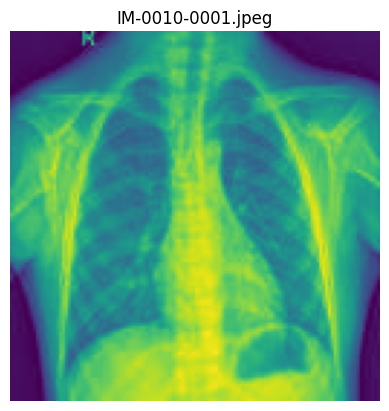

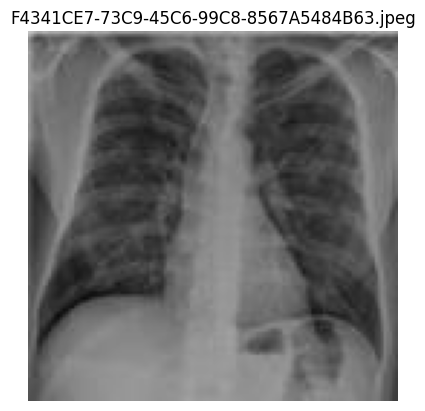

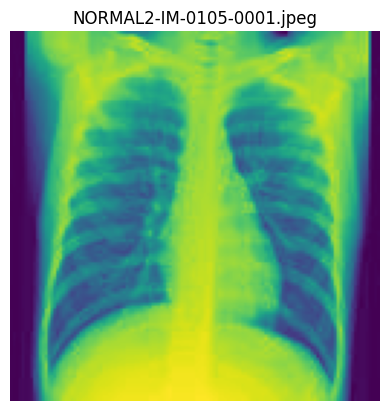

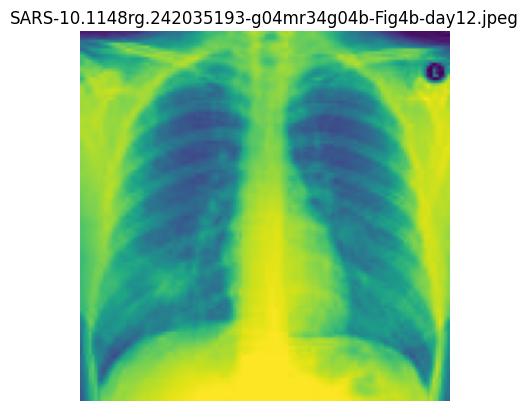

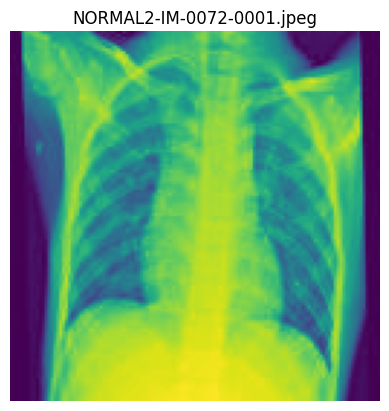

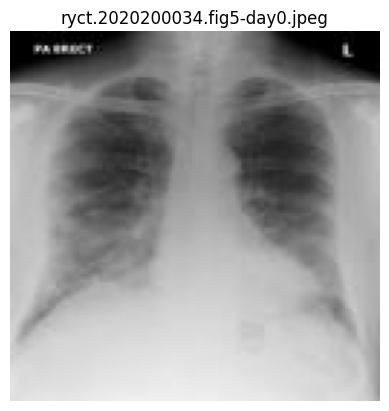

In [6]:
dataset_dir = [train_normal_dir,train_pneumonia_dir,validation_normal_dir,validation_pneumonia_dir,test_normal_dir,test_pneumonia_dir]
for img_dir in dataset_dir:
  mostrar_imagenes_aleatorias(img_dir,num_imagenes=1)

In [7]:
for img_dir in dataset_dir:
  print(f" en directorio :{img_dir} hay {len(os.listdir(img_dir))} imagenes")

 en directorio :/content/drive/MyDrive/Datasets/covid 19/train/NORMAL hay 74 imagenes
 en directorio :/content/drive/MyDrive/Datasets/covid 19/train/PNEUMONIA hay 74 imagenes
 en directorio :/content/drive/MyDrive/Datasets/covid 19/validation/NORMAL hay 10 imagenes
 en directorio :/content/drive/MyDrive/Datasets/covid 19/validation/PNEUMONIA hay 10 imagenes
 en directorio :/content/drive/MyDrive/Datasets/covid 19/test/NORMAL hay 6 imagenes
 en directorio :/content/drive/MyDrive/Datasets/covid 19/test/PNEUMONIA hay 6 imagenes


In [8]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1. /255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
val_data = ImageDataGenerator(rescale=1. /255)
test_data = ImageDataGenerator(rescale=1. /255)

In [10]:
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)
validation_set = train_data.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)
test_set = train_data.flow_from_directory(
    test_dir,
    target_size=(64,64),
    class_mode='binary'
)

Found 148 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

modelo = Sequential()
modelo.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Conv2D(32,(3,3),activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1,activation='sigmoid'))

modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
modelo.compile(loss="binary_crossentropy",
               optimizer='adam',
               metrics=['accuracy'])

In [13]:
history = modelo.fit(training_set,epochs=100,batch_size=100,validation_data=validation_set)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.5343 - loss: 0.7363 - val_accuracy: 1.0000 - val_loss: 0.6128
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.5336 - loss: 0.6957 - val_accuracy: 1.0000 - val_loss: 0.5951
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.5578 - loss: 0.6747 - val_accuracy: 0.7500 - val_loss: 0.5898
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.6480 - loss: 0.6422 - val_accuracy: 0.8500 - val_loss: 0.5623
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.6852 - loss: 0.6219 - val_accuracy: 0.9500 - val_loss: 0.4663
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8599 - loss: 0.5393 - val_accuracy: 0.7500 - val_loss: 0.4138
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.7165 - loss: 0.5643 - val_accuracy: 0.8500 - val_loss: 0.2990
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.7577 - loss: 0.4982 - val_accuracy: 0.9500 - val

In [14]:
evaluacion = modelo.evaluate(test_set)
print(evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.0652
[0.06518635153770447, 1.0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
predicción :  [[0.]]
Es normal


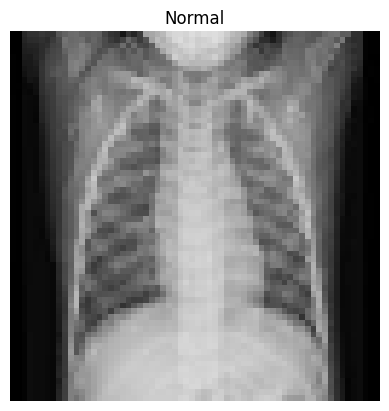

In [37]:
from keras.preprocessing import image
normal = image.load_img("/content/drive/MyDrive/Datasets/covid 19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg",target_size=(64,64))
pneumonia = image.load_img("/content/drive/MyDrive/Datasets/covid 19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg",target_size=(64,64))
imagen_prueba = normal


test_image = image.img_to_array(imagen_prueba)
test_image = np.expand_dims(test_image,axis=0)

training_set.class_indices


result = modelo.predict(test_image)
print("predicción : ",result)
if result[0][0] == 0:
  print("Es normal")
  plt.imshow(imagen_prueba)
  plt.title('Normal')
  plt.axis('off')
  plt.show()
else:
  print("Es pneumonia")
  plt.imshow(imagen_prueba)
  plt.title('Pneumonia')
  plt.axis('off')
  plt.show()

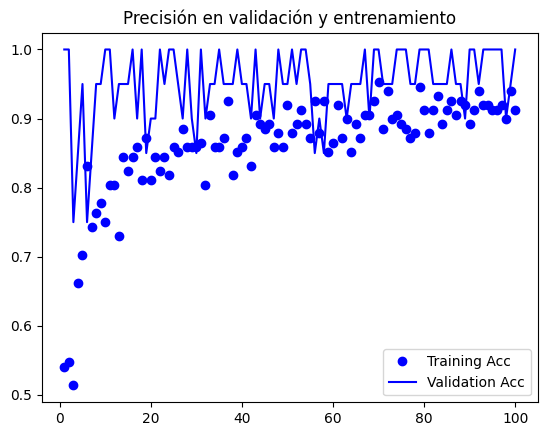

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Precisión en validación y entrenamiento')
plt.legend()
plt.show()

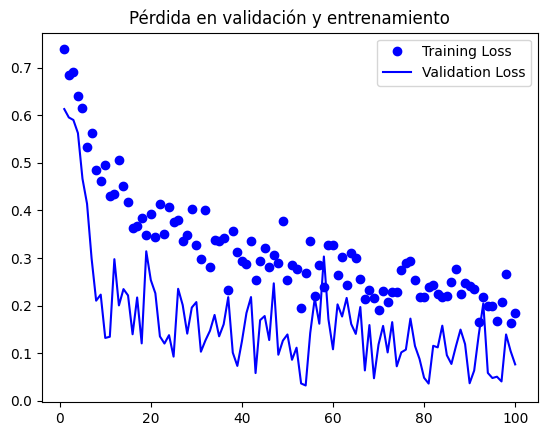

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Pérdida en validación y entrenamiento')
plt.legend()
plt.show()